In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from tqdm import tqdm
import torch.optim as optim
import random

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
class RandomNoise(object):
    def __init__(self, cov):
      self.cov = cov
    def __call__(self, img):
      new_img = img.clone().normal_(0,self.cov) + img
      new_img = new_img + abs(torch.min(new_img))
      new_img /= torch.max(new_img)
      return new_img
    

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
          
def load_dataset(cov):
  transform = transforms.Compose(
      [transforms.ToTensor(),
       RandomNoise(cov),
       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                            shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                           shuffle=False, num_workers=2)

  return trainloader

 bird  frog plane  frog


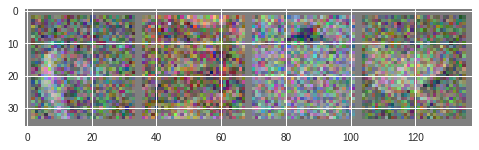

In [21]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [13]:
losses_ratio = []
for ratio in tqdm(range(1,6)):
  losses_ratio.append(fit_and_get_loss(data_batch_size=ratio))

  0%|          | 0/5 [00:00<?, ?it/s]

2.30051140165329
2.250916028857231
2.0902265955209733
1.9561460176706313
1.891068111181259
1.8923726683855058
1.8333095726966857
1.7802135455608368
1.7930818136930466
1.7986476136446
1.7631178098917006
1.7867793772220613
1.7612915773391724
1.7234942051172257
1.6987607420682906
1.7515879765748978
1.6398065460920335
1.7220987108945847
1.7003161869049073
1.6057164508104325
1.6342225868701934
1.672587986588478
1.6047206938266754
1.6679669332504272
1.6345978616476058
1.5641853382587434
1.652805244922638
1.606129150390625
1.6254145749807358
1.6178701627254486
1.5657647079229355
1.6252348818778992
1.5607752410173417
1.5664418247938157
1.6105311510562896
1.5868591194152832
1.5816830031871796
1.505407650947571
1.6012062388658523
1.5932402284145355
1.5293751485347749
1.5517556140422821
1.5546511529684066
1.5672282906770707
1.551368946313858
1.523105772972107
1.5507258833646775
1.5406912822723389
1.5469201500415801


 20%|██        | 1/5 [03:25<13:41, 205.34s/it]

1.52512822329998
Finished Training
2.302030757188797
2.2471528974771497
2.0547705804109575
2.013128989458084
1.9114303202033043
1.8688407737016677
1.817962965786457
1.7491949132084847
1.6584722455143928
1.7013834985494614
1.6480428255200386
1.6076597902178764
1.620534227490425
1.579005354642868
1.5694828643798828
1.5757450917959213
1.5762174180150033
1.5154014139175416
1.5581327993273735
1.5007947522997855
1.5280489464402198
1.4869787005782127
1.4712993152737617
1.4937478850483894


 40%|████      | 2/5 [05:28<09:01, 180.66s/it]

1.476686514735222
Finished Training
2.291325540304184
2.1089909563064575
1.9524136482477188
1.8693931750059127
1.7871034759581088
1.7306563865542413
1.712107804119587
1.6561437404453754
1.5919134229421616
1.570206164419651
1.5701119146049023
1.5359911727216096
1.5257477741241454
1.5235638454705476
1.497015662714839
1.4407066476084291


 60%|██████    | 3/5 [07:04<05:10, 155.24s/it]

Finished Training
2.3028412368297575
2.267918538928032
2.026246155142784
1.8987827851176262
1.82555044734478
1.7189610780477524
1.6663318775296212
1.6256692811846734
1.5960602135062218
1.5758472055196762
1.5301920128464699
1.515196265220642
2.250659760951996
1.4434682031571866
1.458569879949093
1.4541338683962821
1.4170810535848142
1.4409537457227708
1.3917455950379372
1.3749669165015221
1.3791081747114657
1.3420847416818142
1.3518845028281212
1.330680162370205


 80%|████████  | 4/5 [09:45<02:37, 157.01s/it]

Finished Training
2.302762463092804
2.2843965299129487
2.0606370693445206
1.8685435898303986
1.7900712599754334
1.7118051157593728
1.6552640001773835
1.6428632784187793
1.5640939872860908
1.5211848326027393
1.4926525046229362
1.461339324504137
1.4486647610664367
1.444423512428999
1.4322218484133482
1.426145279198885
1.3942251347601413
1.4003769989907742
1.3755385862588883


100%|██████████| 5/5 [12:07<00:00, 152.37s/it]

1.3667033888995648
Finished Training


In [0]:
losses_ratio[3] = losses_ratio[3][:12]

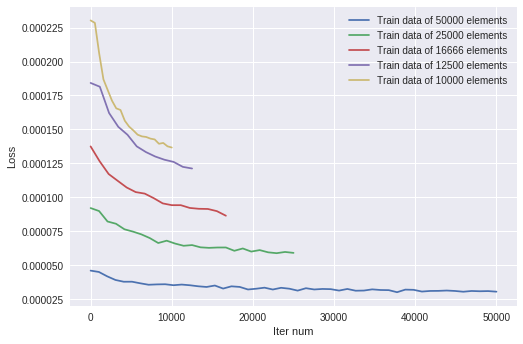

In [15]:
legend = []
for ratio in range(5):
  iter_num = np.linspace(1, 50000 / (ratio + 1), len(losses_ratio[ratio]))
  plt.plot(iter_num, np.array(losses_ratio[ratio]) / (50000 / (ratio + 1)))
  legend.append('Train data of ' + str(int(50000.0 / (ratio + 1))) + ' elements')

plt.legend(legend)
plt.ylabel('Loss')
plt.xlabel('Iter num')
plt.show()
from google.colab import files
plt.savefig('LossHW4.png')
files.download('LossHW4.png') 

In [25]:
cov_array = []
for cov in tqdm(np.arange(0.01, 0.3, 0.04)):
  trainloader = load_dataset(cov)
  cov_array.append(fit_and_get_loss(data_batch_size=5, trainloader=trainloader))



  0%|          | 0/8 [00:00<?, ?it/s]

Files already downloaded and verified
Files already downloaded and verified
2.2989665877819063
2.1533475670814513
1.9095776041150092
1.8128980594277382
1.7255574846565724
1.6777358433604241
1.6171390956044198
1.5804304308891297
1.5390894024670123
1.4814898361563682
1.4701298096776008
1.4337891678214074
2.1515013303160666
1.3805850877463817
1.3797512309253215
1.3568122408092023
1.3528405658006668
1.3336198025345802
1.3418920561373233
1.3182565169334413
1.315590022802353
1.29778932762146
1.2776114351451398
1.2710819554626942




 12%|█▎        | 1/8 [02:39<18:39, 159.86s/it]

Finished Training
Files already downloaded and verified
Files already downloaded and verified
2.2952491339445116
2.164880412220955
1.9180764814019202
1.7986042721867561
1.7159426580071448
1.6165967594981194
1.6158481924533843
1.5892822952866554
1.5517633198499678
1.5137389073371887
1.5014478762745858
1.458352899670601
2.159299944341183
1.425055828988552
1.403790437579155
1.3672331540286542
1.389594036489725
1.349135836839676
1.3406147815287113
1.3368334980010987
1.3122737874984742
1.2914951469898224
1.3138936388194562
1.2883866177797318




 25%|██▌       | 2/8 [05:15<15:51, 158.63s/it]

Finished Training
Files already downloaded and verified
Files already downloaded and verified
2.3014312739372254
2.2031775908470155
1.9853775300979615
1.8389468017220496
1.7478429192304612
1.69589998370409
1.6066874786019325
1.583017358958721
1.5547939006090163
1.5255227806270122
1.5096886841654777
1.5236459555625916
2.157736503660679
1.4450517292022704
1.4191669609844684
1.4068621527850629
1.405322352617979
1.4016429840028286
1.3819414236545562
1.3606997395753861
1.3719576888382434
1.3529646428823472
1.3453038693070412
1.347374796807766




 38%|███▊      | 3/8 [07:53<13:12, 158.40s/it]

Finished Training
Files already downloaded and verified
Files already downloaded and verified
2.300528772354126
2.167867837548256
1.9844434479475022
1.890922966003418
1.766674002289772
1.6854760949611665
1.6538075823783875
1.5982308773994445
1.5735702570676804
1.5617081973552704
1.5532790253162383
1.493360710442066
2.242639890551567
1.4885173680484294
1.4366779625415802
1.4477657639980317
1.378280502974987
1.4145084885954857
1.4049705066382885
1.401440006941557
1.390572269141674
1.3765594015717506
1.3569603636264802
1.3359502094089986




 50%|█████     | 4/8 [10:31<10:32, 158.14s/it]

Finished Training
Files already downloaded and verified
Files already downloaded and verified
2.3024488360881805
2.279885238647461
2.061219776511192
1.9626166036128998
1.8947643011808395
1.789029959857464
1.7295303084254265
1.6736573240160941
1.656805366128683
1.625864570736885
1.592159831881523
1.605489791572094
2.319575934201479
1.546203459918499
1.5213515114486218
1.505276978880167
1.4841641183197498
1.461414681017399
1.4886964330375194
1.4479885703623294
1.4837874624729157
1.4636886684894561
1.466258459031582
1.4312871599197388




 62%|██████▎   | 5/8 [13:11<07:56, 158.77s/it]

Finished Training
Files already downloaded and verified
Files already downloaded and verified
2.3023152270317078
2.2999982616901398
2.264681179523468
2.074173805356026
1.9356047619581223
1.8732280383110047
1.8204103146791457
1.763520898461342
1.7068849566578865
1.6802225950360299
1.6506669014692306
1.6302638170719146
2.381866372704506
1.5691668988466263
1.5455539226233959
1.540219749480486
1.5259465098381042
1.5174721755385399
1.4945472425818442
1.4819852311611175
1.4573115336894988
1.4653564865291118
1.4887425914406776
1.444331629872322




 75%|███████▌  | 6/8 [15:49<05:17, 158.69s/it]

Finished Training
Files already downloaded and verified
Files already downloaded and verified
2.3028413062095643
2.29371729183197
2.2022848550081253
2.0713708683252334
1.985889288187027
1.886372345328331
1.8493361030220985
1.7700270798802376
1.7082732934951783
1.7234070370793342
1.6706686186790467
1.6246185296177864
2.4311172428131105
1.5962563357949258
1.580547334909439
1.570915477693081
1.579212582796812
1.54713755184412
1.5495383340716362
1.5248004689216614
1.5237613179683684
1.4902998740077018
1.530165965229273
1.5033218214511872




 88%|████████▊ | 7/8 [18:30<02:39, 159.44s/it]

Finished Training
Files already downloaded and verified
Files already downloaded and verified
2.303578816175461
2.300172936677933
2.2592191206216814
2.0816367049217224
1.9902166740894318
1.9263585742115974
1.8713155929446221
1.812919122338295
1.7618415816426276
1.745359001815319
1.6789907718896866
1.6638083694577217
2.4775382576584817
1.603322133809328
1.610488838970661
1.5702214435338975
1.5773353504538536
1.5715012719035149
1.5522997255921365
1.546169618934393
1.5205889395475387
1.5139493857324124
1.5089042111039161
1.5149928238391877




100%|██████████| 8/8 [21:10<00:00, 159.53s/it]



Finished Training


In [0]:
cov_array1 = cov_array
for ar in cov_array:
  del ar[12]

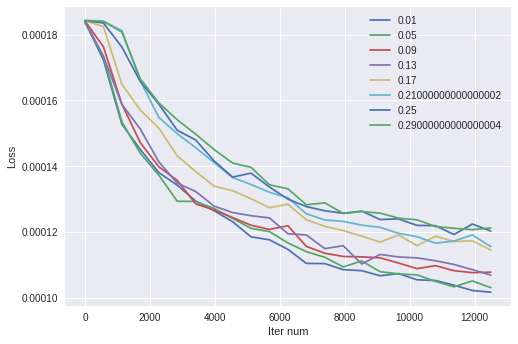

In [31]:
legend = []
for ratio in range(len(cov_array)):
  iter_num = np.linspace(1, 12500, len(cov_array[ratio]))
  plt.plot(iter_num, np.array(cov_array[ratio]) / 12500)

plt.legend(np.arange(0.01, 0.3, 0.04))
plt.ylabel('Loss')
plt.xlabel('Iter num')
plt.show()
from google.colab import files
plt.savefig('LossNoiseHW4.png')
files.download('LossNoiseHW4.png') 

In [0]:
def fit_and_get_loss(data_batch_size=1, cov=0.0, trainloader=trainloader):

  losses = []
  net = Net()

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
  loss_val = 0.0
  epoch_size = 2

  for epoch in range(epoch_size):

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data

          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          loss_val += loss.item()
          if i % 1000 == 999:
            losses.append(loss_val / 1000)
            print(loss_val / 1000)
            loss_val = 0.0

  print('Finished Training')
  return losses


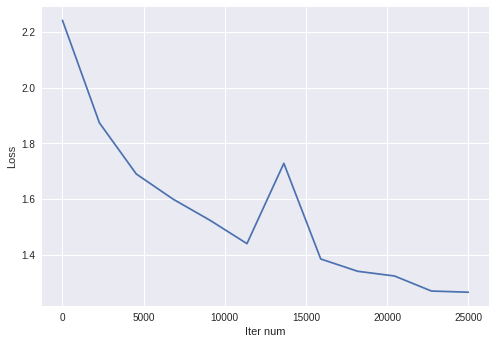

In [24]:
iter_num = np.linspace(1, 25000, 12)
plt.plot(iter_num, losses)
plt.ylabel('Loss')
plt.xlabel('Iter num')
plt.show()
from google.colab import files
plt.savefig('LossHW4.png')
files.download('LossHW4.png') 

In [0]:
outputs = net(images)

In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 53 %
Accuracy of  bird : 33 %
Accuracy of   cat : 44 %
Accuracy of  deer : 47 %
Accuracy of   dog : 51 %
Accuracy of  frog : 73 %
Accuracy of horse : 55 %
Accuracy of  ship : 77 %
Accuracy of truck : 73 %
